# Retail Sales Data - Exploratory Data Analysis (EDA)

A project to uncover business insights from sales data

In [12]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [13]:
#  Load the Dataset
file_path = 'menu.csv'  # Update path if needed
df = pd.read_csv(file_path)

# Show basic info
print("📊 Data Overview:")
df.info()

# Display first few rows
df.head()


📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         26

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [14]:
#  Data Cleaning
# Check for missing values
print("🧼 Missing Values:\n", df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values (example strategy - customize as needed)
df.fillna(method='ffill', inplace=True)

# Convert date columns if any
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns for ease (if necessary)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()


🧼 Missing Values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [15]:
#  Descriptive Statistics
print("📌 Descriptive Statistics:")
display(df.describe(include='all'))


📌 Descriptive Statistics:


,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [16]:
#  Time Series Analysis (if date/time exists)
if 'date' in df.columns:
    df.set_index('date', inplace=True)
    monthly_sales = df.resample('M').sum(numeric_only=True)

    plt.figure(figsize=(14,6))
    sns.lineplot(data=monthly_sales, palette="tab10")
    plt.title('📆 Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()


In [17]:
#  Customer Behavior Analysis (if applicable)
if 'customer_id' in df.columns:
    top_customers = df['customer_id'].value_counts().head(10)
    sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
    plt.title('🏆 Top 10 Customers by Transactions')
    plt.xlabel('Transaction Count')
    plt.ylabel('Customer ID')
    plt.show()


In [18]:
#  Product Analysis (if applicable)
if 'product' in df.columns:
    top_products = df['product'].value_counts().head(10)
    sns.barplot(x=top_products.values, y=top_products.index, palette="Set2")
    plt.title('📌 Top 10 Products Sold')
    plt.xlabel('Quantity')
    plt.ylabel('Product')
    plt.show()


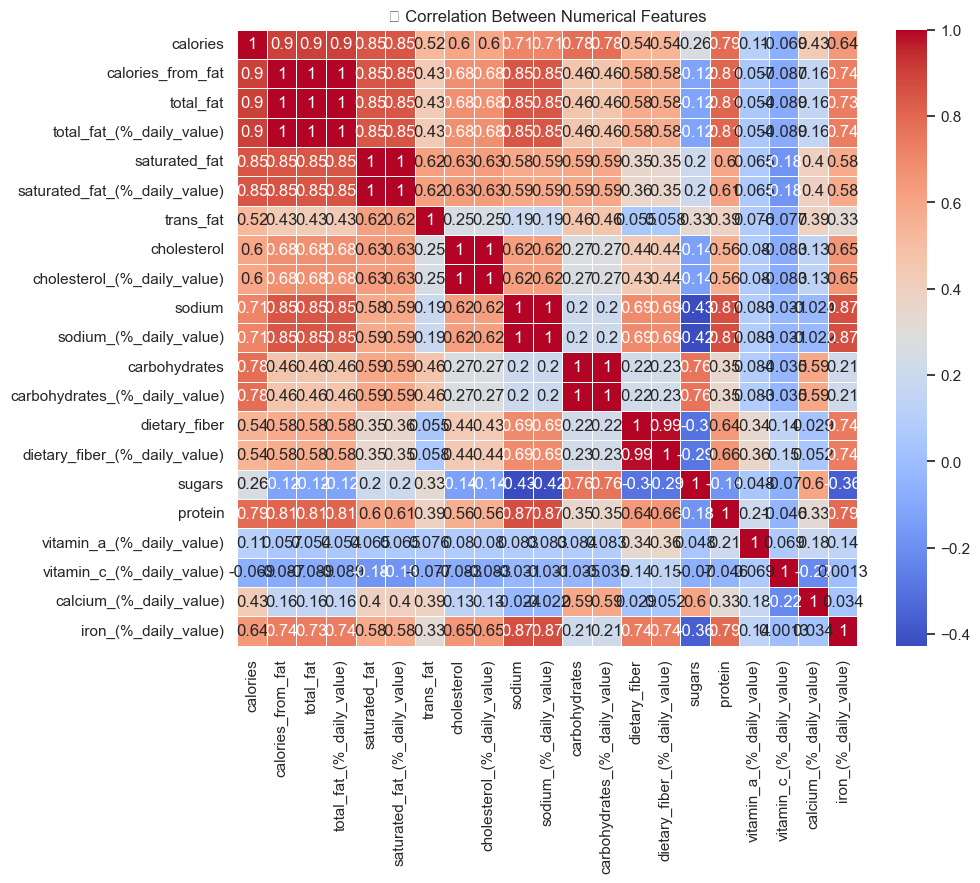

In [19]:
#  Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Correlation Between Numerical Features")
plt.show()


In [11]:
# ✅ Step 9: Actionable Recommendations
from IPython.display import Markdown as md

recommendations = """
###  Business Recommendations:
1. **Inventory Optimization**: Stock more of the top-performing products to meet customer demand.
2. **Customer Retention**: Launch loyalty rewards for the most frequent buyers.
3. **Time-based Promotions**: Use seasonal trend data to time promotions and discounts.
4. **Data Completeness**: Ensure consistent entry of customer and product data to enable better personalization.
5. **Expand Best Categories**: Explore bundling strategies or upselling around the most popular products.
"""
md(recommendations)


###  Business Recommendations:
1. **Inventory Optimization**: Stock more of the top-performing products to meet customer demand.
2. **Customer Retention**: Launch loyalty rewards for the most frequent buyers.
3. **Time-based Promotions**: Use seasonal trend data to time promotions and discounts.
4. **Data Completeness**: Ensure consistent entry of customer and product data to enable better personalization.
5. **Expand Best Categories**: Explore bundling strategies or upselling around the most popular products.
